# Normalizacón y Estandarización

Al trabajar con datos, es común que las características tengan diferentes escalas y unidades. Por ejemplo, en un conjunto de datos podríamos tener:

* Edad: Rango de 0 a 100 años.
    
* Ingresos: Rango de miles a millones de dólares.
    
* Puntuación de examen: Rango de 0 a 10 puntos.

Las diferencias en escala pueden afectar el desempeño de muchos algoritmos de aprendizaje automático, especialmente aquellos que utilizan distancias o gradientes en su cálculo, como la regresión logística, y las redes neuronales.

Cuando no escalamos los datos, pueden surgir algunos de los siguientes problemas:

* Sesgo en Algoritmos Sensibles a Escalas: Características con valores más grandes pueden dominar la función objetivo, haciendo que el modelo preste más atención a ellas.
  
* Convergencia Lenta: En algoritmos de optimización, las diferentes escalas pueden llevar a una convergencia más lenta o a un mínimo local.

* Dificultad en la Interpretación de Coeficientes: En modelos lineales, los coeficientes pueden ser difíciles de interpretar si las características tienen diferentes escalas.

¿Cómo podemos evitar estos problemas?

## Estandarización

La estandarización transforma las características para que tengan media cero y desviación estándar uno.

$z = \frac{x - \mu}{\sigma}$

Donde:
* $x$ Es el valor original
* $\mu$ Es la media de la característica
* $\sigma$ Es la desviación estandar de la característica

La distribución que vamos a obtener es una que tiene media 0 y desviación standar de 1, manteniendo la distribución de datos original.

Este tipo de escalado es particularmente útil si tenemos una distribución normal


## Normalización Min-Max (Min-Max Scaling)

Escala las características para que estén dentro de un rango específico, típicamente entre 0 y 1

$x_{escalada} = \frac{x - x_{min}}{x_{max} - x_{min}}$

Donde:
* $x_{min} x_{max}$ Son los valores minimo y máximo de la característica

Hay que tener en cuenta que este tipo de transformación es sensible a outliers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [83]:
X.shape

(178, 13)

In [87]:
X2 = np.delete(X, np.s_[-1:], axis=1)
X = X2

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2, stratify=y)


In [4]:
# Cargar el conjunto de datos Wine
data = load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


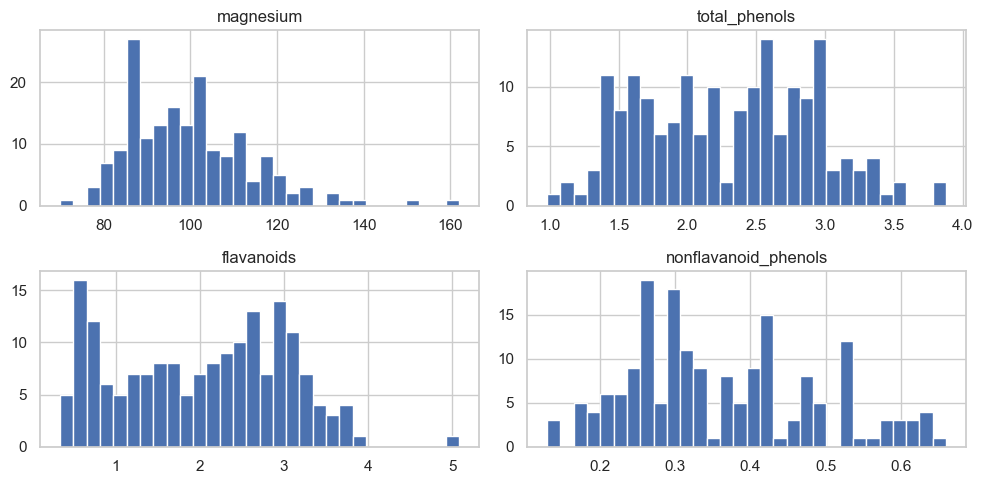

In [75]:
# Histograma de algunas características antes de la normalización
df[feature_names[4:8]].hist(bins=30, figsize=(10, 5))
plt.tight_layout()
plt.show()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2, stratify=y)


**Apliquemos una regresión logistica sin normalización**

In [16]:
logreg = LogisticRegression(max_iter=30, random_state=2)
logreg

LogisticRegression(max_iter=30, random_state=2)

In [18]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=30, random_state=2)

In [20]:
y_pred = logreg.predict(X_test)

In [55]:
y_pred

array([2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1,
       1, 0, 1, 1, 1, 2, 1, 0, 1, 1])

In [57]:
y_test

array([2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1,
       2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       1, 0, 2, 2, 1, 2, 0, 0, 1, 1])

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo sin escalado: {accuracy * 100:.2f}%")

Precisión del modelo sin escalado: 74.07%


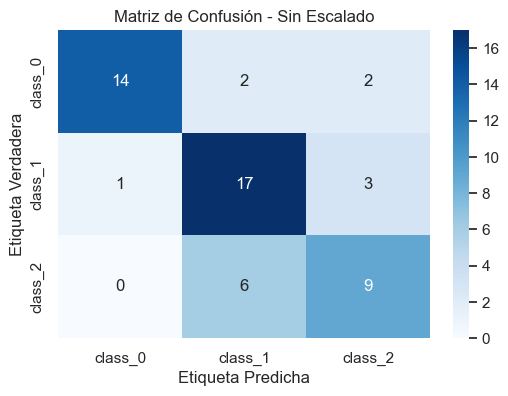

In [26]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Visualizar la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusión - Sin Escalado')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

**Aplicamos el modelo ahora aplicando la estandarización**

In [91]:
scaler = StandardScaler()
scaler

StandardScaler()

In [93]:
X_train_scaled = scaler.fit_transform(X_train)

In [95]:
X_test_scaled = scaler.transform(X_test)

In [97]:
logreg_scaled = LogisticRegression(max_iter=30, random_state=2)
logreg_scaled

LogisticRegression(max_iter=30, random_state=2)

In [99]:
logreg_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=30, random_state=2)

In [101]:
y_pred_scaled = logreg_scaled.predict(X_test_scaled)

In [103]:
y_pred_scaled

array([2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1,
       2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2,
       1, 0, 2, 2, 1, 2, 0, 0, 1, 1])

In [105]:
y_test

array([2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1,
       2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       1, 0, 2, 2, 1, 2, 0, 0, 1, 1])

In [107]:
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Precisión del modelo con estandarización: {accuracy_scaled * 100:.2f}%")

Precisión del modelo con estandarización: 96.30%


In [67]:
98.15 - 74.07

24.080000000000013

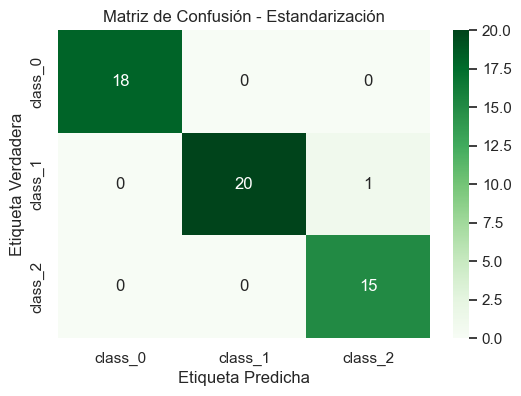

In [69]:
conf_matrix_scaled = confusion_matrix(y_test, y_pred_scaled)
conf_matrix_scaled_df = pd.DataFrame(conf_matrix_scaled, index=class_names, columns=class_names)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_scaled_df, annot=True, cmap='Greens', fmt='d')
plt.title('Matriz de Confusión - Estandarización')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

Si revisamos los coeficientes de los modelos, debemos considerar lo siguiente: 

* Sin escalado, los coeficientes pueden ser difíciles de interpretar debido a las diferentes escalas de las características.

* Con estandarización, los coeficientes reflejan la importancia relativa de cada característica.

In [73]:
# Coeficientes sin escalado
coef_no_scale = pd.Series(logreg.coef_[0], index=feature_names)
print("Coeficientes sin escalado:")
print(coef_no_scale)
print("")
print("")
print("")
print("")
# Coeficientes con estandarización
coef_scaled = pd.Series(logreg_scaled.coef_[0], index=feature_names)
print("Coeficientes con estandarización:")
print(coef_scaled)


Coeficientes sin escalado:
alcohol                        -0.014655
malic_acid                     -0.004195
ash                            -0.002413
alcalinity_of_ash              -0.043470
magnesium                      -0.062921
total_phenols                   0.000130
flavanoids                      0.003664
nonflavanoid_phenols           -0.001021
proanthocyanins                -0.000187
color_intensity                -0.006417
hue                            -0.000659
od280/od315_of_diluted_wines    0.000103
proline                         0.009170
dtype: float64




Coeficientes con estandarización:
alcohol                         0.723616
malic_acid                      0.053517
ash                             0.439126
alcalinity_of_ash              -0.791455
magnesium                      -0.004942
total_phenols                   0.219015
flavanoids                      0.663571
nonflavanoid_phenols           -0.044237
proanthocyanins                 0.041672
color_intensity   